<a href="https://colab.research.google.com/github/MuhammadBayuNugroho/analisis-sentimen-artikel/blob/main/Baru_of_04_FIKS_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing Dataset & EDA**

## 1. Import Library yang digunakan

In [ ]:
# Install Satrawi
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nltk.download('stopwords')

from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Masukkan Dataset

In [ ]:
# Masukkan dataset yang digunakan
file_path = '/content/drive/MyDrive/Dataset Analisis Sentimen/Baru - Dataset Hasil EDA Awal.csv'
dataset = pd.read_csv(file_path)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Video ID             1711 non-null   object 
 1   Author               1711 non-null   object 
 2   Comment              1711 non-null   object 
 3   Published At         1711 non-null   object 
 4   Sentiment            1711 non-null   object 
 5   Revised_Sentiment    1711 non-null   object 
 6   Comment Length       1711 non-null   int64  
 7   Tokenized Words      1711 non-null   object 
 8   Average Word Length  1711 non-null   float64
 9   clean_comment        1711 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 133.8+ KB


In [ ]:
dataset.head(10)

,Video ID,Author,Comment,Published At,Sentiment,Revised_Sentiment,Comment Length,Tokenized Words,Average Word Length,clean_comment
0,R55pRFBDyAI,@nikitaCalista,baterai mahal mending beli,2024-11-04 12:45:25+00:00,negative,negative,26,"['baterai', 'mahal', 'mending', 'beli']",5.750000,baterai mahal mending beli
1,R55pRFBDyAI,@netizenjulid9591,subsidi mobil listrik orng kaya guys klau emis...,2024-09-17 18:46:59+00:00,neutral,neutral,102,"['subsidi', 'mobil', 'listrik', 'orng', 'kaya'...",4.722222,subsidi mobil listrik orng kaya guys klau emis...
2,R55pRFBDyAI,@mintopar4868,menghemat listrik mobil pakai panel sorya solo...,2023-10-10 11:36:00+00:00,positive,positive,51,"['menghemat', 'listrik', 'mobil', 'pakai', 'pa...",6.428571,menghemat listrik mobil pakai panel sorya solo...
3,R55pRFBDyAI,@biarbisa2629,mudahan ciptakan mesinnya terbatas listriknya,2023-06-21 06:00:23+00:00,negative,negative,45,"['mudahan', 'ciptakan', 'mesinnya', 'terbatas'...",8.200000,mudahan ciptakan mesinnya terbatas listriknya
4,R55pRFBDyAI,@pokemonstuff3269,regulasi safetynya gak dibahas parkir garasi r...,2023-03-07 05:42:02+00:00,positive,positive,411,"['regulasi', 'safetynya', 'gak', 'dibahas', 'p...",7.408163,regulasi safetynya gak dibahas parkir garasi r...
5,R55pRFBDyAI,@anasarrow3708,dimengerti pemerintah menukar mosin dg molis h...,2023-02-25 14:24:57+00:00,positive,negative,241,"['dimengerti', 'pemerintah', 'menukar', 'mosin...",6.562500,dimengerti pemerintah menukar mosin dg molis h...
6,R55pRFBDyAI,@zulhamidi7388,susahnya perjalanan mobil listrik cocok ditera...,2022-12-29 19:56:18+00:00,positive,positive,110,"['susahnya', 'perjalanan', 'mobil', 'listrik',...",8.250000,susahnya perjalanan mobil listrik cocok ditera...
7,R55pRFBDyAI,@ayatostore5140,fikirin solusi dasar bahan bakarnya emg listri...,2022-12-07 15:02:14+00:00,negative,negative,222,"['fikirin', 'solusi', 'dasar', 'bahan', 'bakar...",5.371429,fikirin solusi dasar bahan bakarnya emg listri...
8,R55pRFBDyAI,@hamidi7284,mobil listerik mahal ketimbang mobil bbm jawab...,2022-12-05 09:19:30+00:00,negative,negative,293,"['mobil', 'listerik', 'mahal', 'ketimbang', 'm...",6.945946,mobil listerik mahal ketimbang mobil bbm jawab...
9,R55pRFBDyAI,@srihastuti8636,darimana mobil listrik ramah lingkungankalo mo...,2022-11-14 02:09:59+00:00,positive,positive,350,"['darimana', 'mobil', 'listrik', 'ramah', 'lin...",6.800000,darimana mobil listrik ramah lingkungankalo mo...


## 3. Preprocessing Data

In [ ]:
# Ubah komentar menjadi lowercase
dataset['Comment'] = dataset['Comment'].str.lower()

# Hapus spasi, karakter spesial, dan angka
dataset['Comment'] = dataset['Comment'].str.replace('[^a-z\s]', '', regex=True)

# Hapus stopwords
stop_words = set(stopwords.words('indonesian'))
dataset['Tokenized Words'] = dataset['Tokenized Words'].apply(lambda x: [word for word in x if word not in stop_words])

# Tokenisasi
dataset['Tokenized Words'] = dataset['Comment'].apply(lambda x: x.split())

# Tampilkan hasil tokenisasi
dataset['Tokenized Words'].head()

,Tokenized Words
0,"[baterai, mahal, mending, beli]"
1,"[subsidi, mobil, listrik, orng, kaya, guys, kl..."
2,"[menghemat, listrik, mobil, pakai, panel, sory..."
3,"[mudahan, ciptakan, mesinnya, terbatas, listri..."
4,"[regulasi, safetynya, gak, dibahas, parkir, ga..."


In [ ]:
# Stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

dataset['Stemmed Words'] = dataset['Tokenized Words'].apply(
    lambda x: [stemmer.stem(word) for word in x])

In [ ]:
# Gabungkan kembali token untuk membentuk teks yang telah dibersihkan
dataset['Cleaned Comment'] = dataset['Stemmed Words'].apply(lambda x: ' '.join(x))

# Hapus kolom yang tidak diperlukan dan simpan data yang sudah dibersihkan
dataset_cleaned = dataset[['Cleaned Comment', 'Revised_Sentiment']]

dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cleaned Comment    1711 non-null   object
 1   Revised_Sentiment  1711 non-null   object
dtypes: object(2)
memory usage: 26.9+ KB


In [ ]:
# Tampilkan hasilnya
dataset_cleaned.head()

,Cleaned Comment,Revised_Sentiment
0,baterai mahal mending beli,negative
1,subsidi mobil listrik orng kaya guys klau emis...,neutral
2,hemat listrik mobil pakai panel sorya solosinya,positive
3,mudah cipta mesin batas listrik,negative
4,regulasi safetynya gak bahas parkir garasi rum...,positive


## 4. Simpan Dataset Hasil Preprocessing

In [ ]:
# Simpan dataset hasil preprocessing
dataset_cleaned.to_csv('cleaned_dataset_preprocessing.csv', index=False)

# **EDA Data yang sudah dibersihkan**

## 1. Masukkan dataset

In [ ]:
dataset_path = '/content/cleaned_dataset_preprocessing.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# Menampilkan Informasi Awal Dataset
print("Informasi dataset:")
print(data.info())
print("\nStatistik deskriptif dataset:")
print(data.describe())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cleaned Comment    1711 non-null   object
 1   Revised_Sentiment  1711 non-null   object
dtypes: object(2)
memory usage: 26.9+ KB
None

Statistik deskriptif dataset:
       Cleaned Comment Revised_Sentiment
count             1711              1711
unique            1706                 3
top        keren mobil          positive
freq                 2              1013


## 2. Cek Missing Values dan Visualisasikan


Jumlah missing values per kolom:
Cleaned Comment      0
Revised_Sentiment    0
dtype: int64


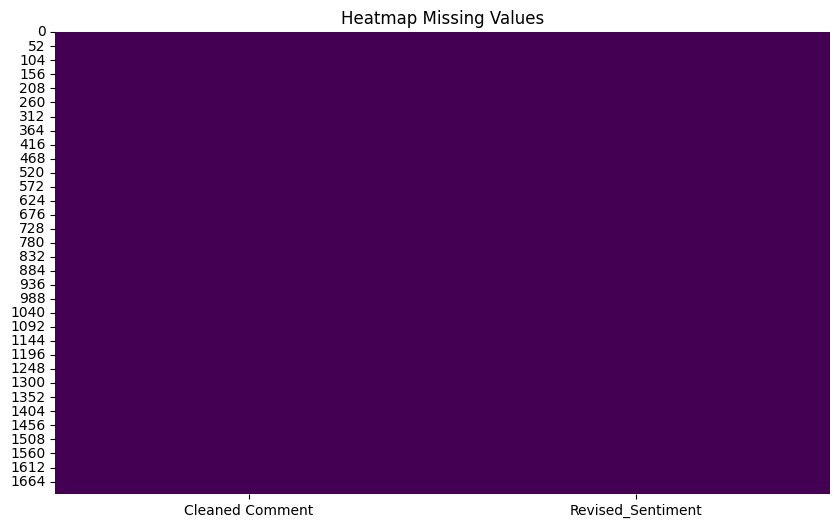

In [ ]:
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# Visualisasi missing values dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Missing Values")
plt.show()

## 3. Analisis Distribusi Sentimen


Distribusi sentimen:
Revised_Sentiment
positive    1013
negative     488
neutral      210
Name: count, dtype: int64


<ipython-input-53-15c9229b65db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revised_Sentiment', data=data, palette='viridis')


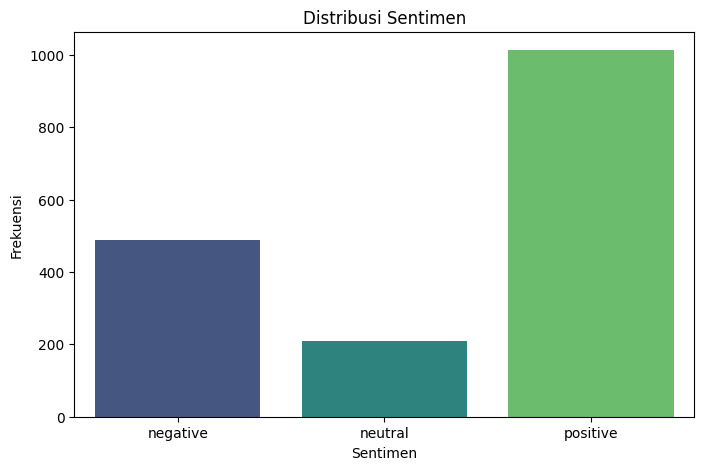

In [ ]:
# Melihat jumlah data per kategori sentimen
print("\nDistribusi sentimen:")
print(data['Revised_Sentiment'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='Revised_Sentiment', data=data, palette='viridis')
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Frekuensi")
plt.show()

## 4. Analisis Panjang Komentar

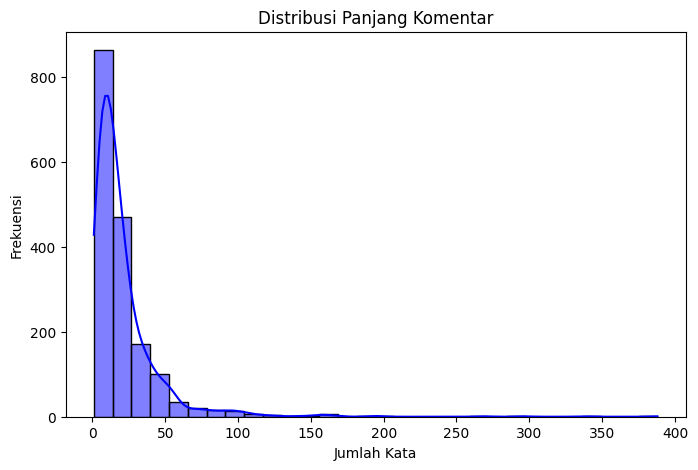

In [ ]:
# Menghitung panjang komentar (dalam jumlah kata)
data['Comment Length'] = data['Cleaned Comment'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(data['Comment Length'], bins=30, kde=True, color='blue')
plt.title("Distribusi Panjang Komentar")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.show()

## 5. Analisis WordCloud Per Sentimen

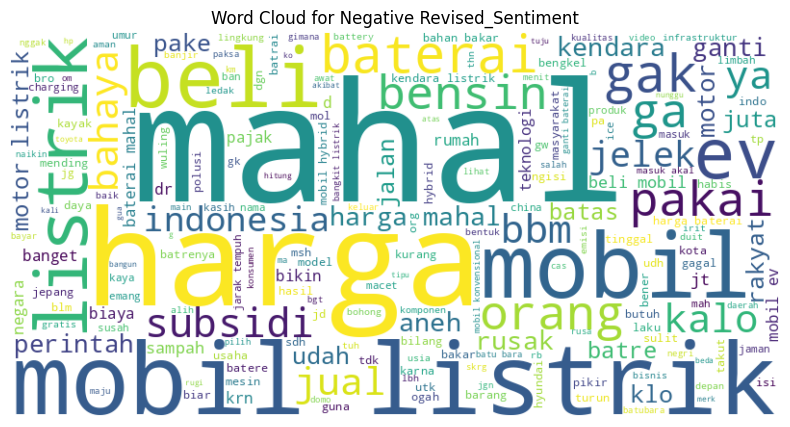

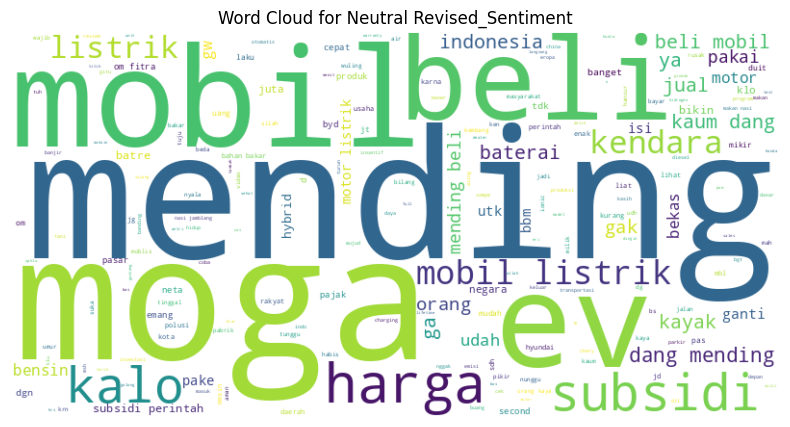

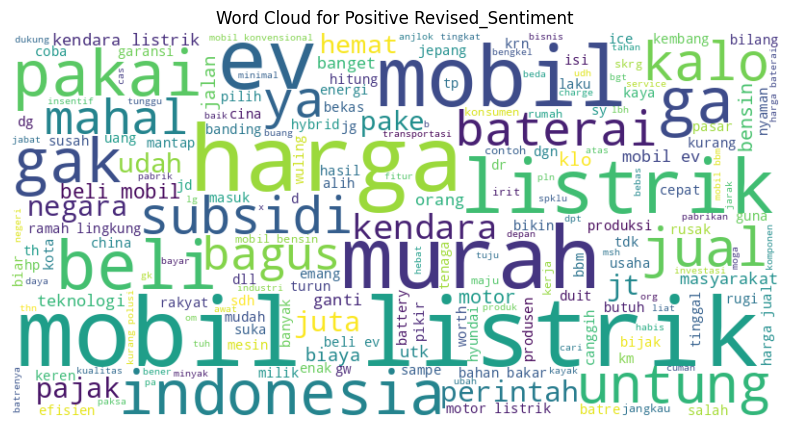

In [ ]:
# Tokenisasi kata dari komentar
data['Tokenized Words'] = data['Cleaned Comment'].apply(lambda x: x.split())

# Gabungkan semua kata untuk setiap sentimen
sentiment_words = data.groupby('Revised_Sentiment')['Tokenized Words'].sum()

# Hasilkan wordcloud untuk setiap sentimen
for sentiment, words in sentiment_words.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Revised_Sentiment')
    plt.axis('off')
    plt.show()

## 6. Analisis Kata Paling Umum

<ipython-input-58-f482a4989a53>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=common_words_df, palette='viridis')


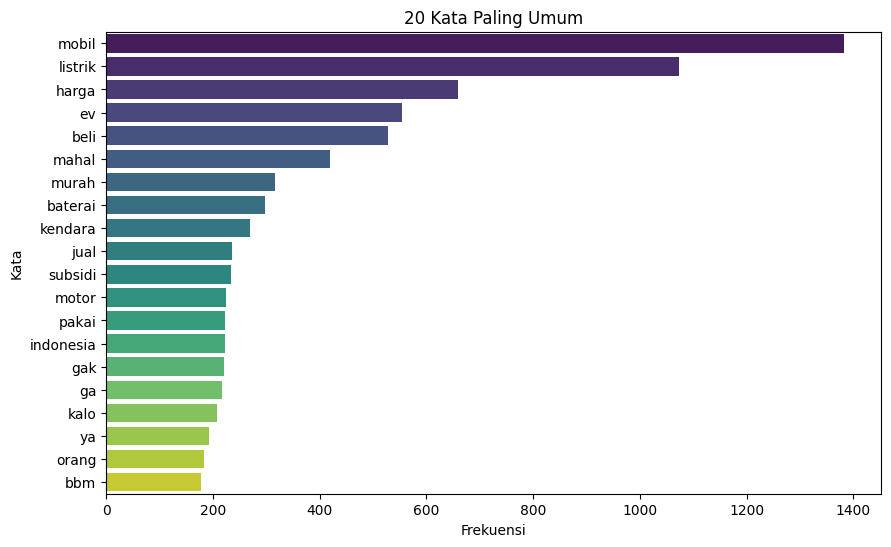

In [ ]:
from collections import Counter

# Gabungkan semua kata dari kolom 'Cleaned Comment' menjadi satu string
all_words = ' '.join(data['Cleaned Comment'].astype(str).tolist())

# Menghitung frekuensi kata
word_counts = Counter(all_words.split())
common_words = word_counts.most_common(20)

# Membuat DataFrame untuk visualisasi
common_words_df = pd.DataFrame(common_words, columns=['Kata', 'Frekuensi'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='Kata', data=common_words_df, palette='viridis')
plt.title("20 Kata Paling Umum")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()

## 7. Cek ulang isi dataset

In [ ]:
data.head(10)

,Cleaned Comment,Revised_Sentiment,Comment Length,Tokenized Words
0,baterai mahal mending beli,negative,4,"[baterai, mahal, mending, beli]"
1,subsidi mobil listrik orng kaya guys klau emis...,neutral,18,"[subsidi, mobil, listrik, orng, kaya, guys, kl..."
2,hemat listrik mobil pakai panel sorya solosinya,positive,7,"[hemat, listrik, mobil, pakai, panel, sorya, s..."
3,mudah cipta mesin batas listrik,negative,5,"[mudah, cipta, mesin, batas, listrik]"
4,regulasi safetynya gak bahas parkir garasi rum...,positive,49,"[regulasi, safetynya, gak, bahas, parkir, gara..."
5,erti perintah tukar mosin dg mol harga masuk a...,negative,32,"[erti, perintah, tukar, mosin, dg, mol, harga,..."
6,susah jalan mobil listrik cocok terap indonesi...,positive,12,"[susah, jalan, mobil, listrik, cocok, terap, i..."
7,fikirin solusi dasar bahan bakar emg listrik b...,negative,35,"[fikirin, solusi, dasar, bahan, bakar, emg, li..."
8,mobil listerik mahal ketimbang mobil bbm jawab...,negative,37,"[mobil, listerik, mahal, ketimbang, mobil, bbm..."
9,darimana mobil listrik ramah lingkungankalo mo...,positive,45,"[darimana, mobil, listrik, ramah, lingkunganka..."


In [ ]:
# Hapus kolom comment lenght dan tokenized word
data = data.drop(columns=['Comment Length', 'Tokenized Words'])

In [ ]:
data.head(10)

,Cleaned Comment,Revised_Sentiment
0,baterai mahal mending beli,negative
1,subsidi mobil listrik orng kaya guys klau emis...,neutral
2,hemat listrik mobil pakai panel sorya solosinya,positive
3,mudah cipta mesin batas listrik,negative
4,regulasi safetynya gak bahas parkir garasi rum...,positive
5,erti perintah tukar mosin dg mol harga masuk a...,negative
6,susah jalan mobil listrik cocok terap indonesi...,positive
7,fikirin solusi dasar bahan bakar emg listrik b...,negative
8,mobil listerik mahal ketimbang mobil bbm jawab...,negative
9,darimana mobil listrik ramah lingkungankalo mo...,positive


## 8. Simpan dataset dengan kolom Cleaned Comment dan Revised_Sentiment

In [ ]:
# Simpan data hasil analisis data preprocessing
data.to_csv('dataset_eda_preprocessing.csv', index=False)

## Hasil akhir dataset ini adalah sebanyak **1711** komentar, terdiri dari:

1. Sentimen positive : 1013
2. Sentimen negative : 488
3. Sentimen neutral : 210